### Biblioteki używane w rozwiązaniu zadania

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Zadanie

Zapiszmy podane informacje o populacji Stanów Zjednoczonych na przestrzeni lat w postaci tablic numpy'owych.

In [2]:
year = np.array([1900,
                1910,
                1920,
                1930,
                1940,
                1950,
                1960,
                1970,
                1980], dtype = np.double) # so that there is no overflow in Vandermonde matrix

population = np.array([76212168,
                        92228496,
                        106021537,
                        123202624,
                        132164569,
                        151325798,
                        179323175,
                        203302031,
                        226542199])

Powyższe dane tworzą zbiór 9 punktów - pary postaci: (rok, populacja). Jeżeli przedstawimy je w układzie współrzędnych, to dokładnie jeden wielomian ósmego stopnia przez nie przechodzi, ale może on być różnie reprezentowany. Poniżej przedstawiamy 4 proste funkcje przekształcające dane, pomocne przy sprowadzaniu do funkcji bazowych w macierzy Vandermonde'a.

In [3]:
base1 = lambda t: t
base2 = lambda t: t - 1900
base3 = lambda t: t - 1940
base4 = lambda t: (t - 1940) / 40

Korzystając z tych funkcji bazowych, zbudujemy macierze Vandermonde'a dla każdej z reprezentacji (Uwaga! Budujemy macierz z malejącymi potęgami - dla rosnących otrzymane wyniki były błędne). Następnie policzymy dla każdej z nich współczynnik uwarunkowania i do dalszych obliczeń użyjemy tej, dla której jest on najmniejszy. 

In [4]:
vandermonde1 = np.vander(base1(year))
vandermonde2 = np.vander(base2(year))
vandermonde3 = np.vander(base3(year))
vandermonde4 = np.vander(base4(year))

In [5]:
cond1 = np.linalg.cond(vandermonde1)
cond2 = np.linalg.cond(vandermonde2)
cond3 = np.linalg.cond(vandermonde3)
cond4 = np.linalg.cond(vandermonde4)

print(cond1, cond2, cond3, cond4, sep = '\n')

1.0685283277767597e+42
5994335190596687.0
9315536038627.47
1605.4437004786505


Zobaczmy, jak wygląda ta macierz.

In [6]:
vandermonde4

array([[ 1.00000000e+00, -1.00000000e+00,  1.00000000e+00,
        -1.00000000e+00,  1.00000000e+00, -1.00000000e+00,
         1.00000000e+00, -1.00000000e+00,  1.00000000e+00],
       [ 1.00112915e-01, -1.33483887e-01,  1.77978516e-01,
        -2.37304688e-01,  3.16406250e-01, -4.21875000e-01,
         5.62500000e-01, -7.50000000e-01,  1.00000000e+00],
       [ 3.90625000e-03, -7.81250000e-03,  1.56250000e-02,
        -3.12500000e-02,  6.25000000e-02, -1.25000000e-01,
         2.50000000e-01, -5.00000000e-01,  1.00000000e+00],
       [ 1.52587891e-05, -6.10351562e-05,  2.44140625e-04,
        -9.76562500e-04,  3.90625000e-03, -1.56250000e-02,
         6.25000000e-02, -2.50000000e-01,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.52587891e-05,  6.10351562e-05,  2.44140625e-04,
         9.76562500e-04,  3.90625000e-03,  1.562500

Teraz z odpowiedniego równania obliczamy kolumnę współczynników, które stoją przed kolejnymi (malejąco) potęgami wielomianu w jego naturalnej reprezentacji.

In [7]:
coeffs = np.linalg.solve(vandermonde4, population)
coeffs

array([-3.15180235e+08,  1.89175576e+08,  6.06291250e+08, -3.42668456e+08,
       -3.74614715e+08,  1.82527130e+08,  1.02716315e+08,  4.61307656e+07,
        1.32164569e+08])

Poniżej znajduje się nasza implementacja metody Hornera.

In [8]:
def horner(coeffs, x):
    res = 0
    for i in coeffs: res = res * x + i
    return res

Zobaczmy, jak wygląda wykres wyznaczonego wielomianu. Powinien on przechodzić przez wszystkie węzły interpolacji, tzn. wcześniej wspomniane punkty.

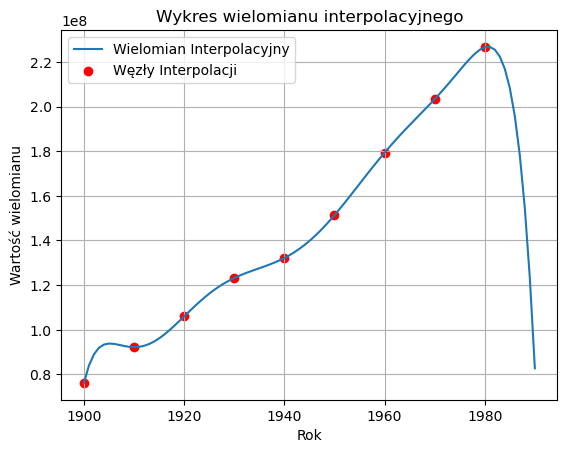

In [9]:
xs = np.arange(1900, 1991, 1)
ys = horner(coeffs, base4(xs))

plt.plot(xs, ys, label = 'Wielomian Interpolacyjny')
plt.scatter(year, population, color = 'red', label = 'Węzły Interpolacji')
plt.xlabel('Rok')
plt.ylabel('Wartość wielomianu')
plt.title('Wykres wielomianu interpolacyjnego')
plt.legend()
plt.grid(True)
plt.show()

Dokonamy ekstrapolacji do roku 1990 i porównamy otrzymaną wartość z wartością rzeczywistą. Następnie obliczymy błąd względny.

In [10]:
calc_val = horner(coeffs, base4(1990))
act_val = 248709873
rel_error = np.abs(act_val - calc_val) / act_val
print("Actual value: ", act_val)
print("Calculated value: ", calc_val)
print("Relative error: ", rel_error) 

Actual value:  248709873
Calculated value:  82749140.99999541
Relative error:  0.6672864651416737


### Porównanie wyników dla zaokrąglonych danych

Zobaczmy co się stanie, jeżeli dane dotyczące liczby mieszkańców zaokrąglimy z dokładnością do jednego miliona.

In [11]:
population_rounded = np.round(population, decimals = -6)
population_rounded

array([ 76000000,  92000000, 106000000, 123000000, 132000000, 151000000,
       179000000, 203000000, 227000000])

Dla tych danych użyjemy najlepiej uwarunkowanej bazy z tych wyznaczonych wcześniej, tzn. bazy `vandermonde4` aby obliczyć współczynniki wielomianu.

In [12]:
coeffs = np.linalg.solve(vandermonde4, population_rounded)
coeffs

array([-2.94196825e+08,  1.86920635e+08,  5.70311111e+08, -3.38488889e+08,
       -3.56755556e+08,  1.81111111e+08,  1.00141270e+08,  4.59571429e+07,
        1.32000000e+08])

Spójrzmy na wykres wielomianu w tym podejściu.

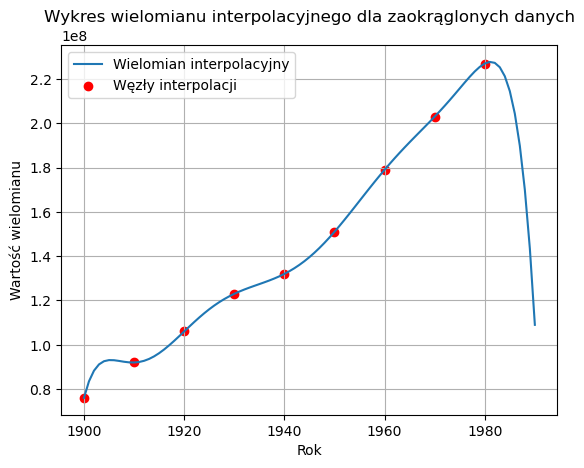

In [13]:
xs = np.arange(1900, 1991, 1)
ys = horner(coeffs, base4(xs))

plt.plot(xs, ys, label = 'Wielomian interpolacyjny')
plt.scatter(year, population_rounded, color = 'red', label = 'Węzły interpolacji')
plt.xlabel('Rok')
plt.ylabel('Wartość wielomianu')
plt.title('Wykres wielomianu interpolacyjnego dla zaokrąglonych danych')
plt.legend()
plt.grid(True)
plt.show()

Porównajmy rezultaty ekstrapolacji do roku 1990 na analogicznej płaszczyźnie jak dla wielomianu dla oryginalnych danych.

In [14]:
calc_val_rounded = horner(coeffs, base4(1990))
rel_error_rounded = np.abs(act_val - calc_val_rounded) / act_val
print("Actual value: ", act_val)
print("Calculated value for rounded data: ", calc_val_rounded)
print("Relative error for rounded data: ", rel_error_rounded) 

Actual value:  248709873
Calculated value for rounded data:  108999999.99999957
Relative error for rounded data:  0.5617383472348138


Okazuje się, że wizualnie wielomian wygląda podobnie, ale otrzymujemy mniejszy błąd względny. Szerzej o tym traktujemy w sprawozdaniu.

## Wielomian interpolacyjny Lagrange'a

Na podstawie węzłów interpolacji podanych w zadaniu wyznaczamy teraz wielomian interpolacyjny Lagrange'a. Bazując na wzorach podanych w materiałach pomocniczych do laboratorium, obliczamy wartości wielomianu w odstępach jednorocznych (w przedziale lat 1900 - 1990). Jako że współczynniki $\ell_j(t)$ zależą od punktu, w którym obliczamy wartość wielomianu, przejdziemy od razu do wyznaczenia wszystkich szukanych wartości.

In [15]:
def lagrange_interpolation_values(x, x_nodes, y_nodes):
    n = len(x_nodes)
    result = np.zeros(len(x)) 
    l_coeffs_denom = np.zeros(n)
    
    #denominators are dependent only on given data, so we prepare it in advance
    for i in range(n):
        l_coeffs_denom[i] = np.prod(x_nodes[:i] - x_nodes[i]) * np.prod(x_nodes[i + 1:] - x_nodes[i])
  
    for i in range(n):
        term = y_nodes[i]
        for j in range(n):
            if j != i:
                term *= (x - x_nodes[j])
        result += term / l_coeffs_denom[i]
        
    return result

Czy otrzymamy inny wykres niż w poprzednich rozważaniach? Zobaczmy.

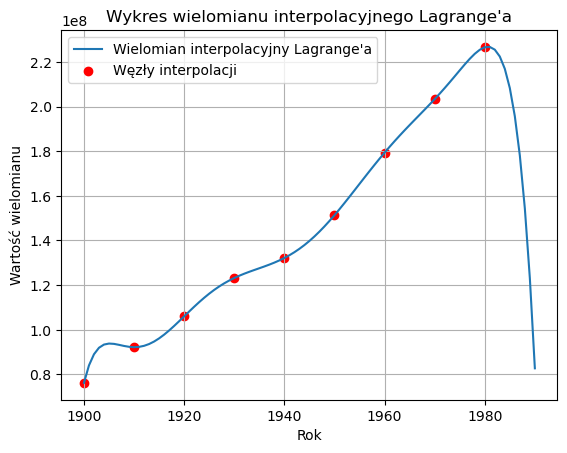

In [16]:
xs = np.arange(1900, 1991, 1)
ys = lagrange_interpolation_values(xs, year, population)

plt.plot(xs, ys, label = 'Wielomian interpolacyjny Lagrange\'a')
plt.scatter(year, population, color = 'red', label = 'Węzły interpolacji')
plt.xlabel('Rok')
plt.ylabel('Wartość wielomianu')
plt.title('Wykres wielomianu interpolacyjnego Lagrange\'a')
plt.legend()
plt.grid(True)
plt.show()

Okazuje się, że wygląda bardzo podobnie... Potwierdźmy podobieństwo, bazując na wynikach liczbowych - spójrzmy na szczegóły dotyczące ekstrapolacji do roku 1990.

In [17]:
calc_val = ys[-1]
rel_error = np.abs(act_val - calc_val) / act_val
print("Actual value: ", act_val)
print("Calculated value for Lagrange Interpolation Polynomial: ", calc_val)
print("Relative error: ", rel_error) 

Actual value:  248709873
Calculated value for Lagrange Interpolation Polynomial:  82749141.00000572
Relative error:  0.6672864651416323


## Wielomian interpolacyjny Newtona

Współczynnikami stojącymi przed wielomianami bazowymi $\pi_j(t)$ w wielomianie interpolacyjnym Newtona są odpowiednie ilorazy różnicowe. Poniżej definiujemy funkcję obliczającą je.

In [18]:
def newton_polynomial_coeffs(x_nodes, y_nodes):
    n = len(x_nodes)
    dd = np.array(y_nodes, copy = True, dtype = np.double)
    
    #building divided differences matrix
    for i in range(1, n):
        dd[i : n] = (dd[i : n] - dd[i - 1]) / (x_nodes[i : n] - x_nodes[i - 1])
        
    return dd

Korzystając z powyższej funkcji, wyznaczamy wartości wielomianu interpolacyjnego Newtona. Używamy wzorów na wielomiany bazowe $\pi_j(t)$ zgodnie z materiałami pomocniczymi, natomiast nie wyznaczamy ich oddzielnie - od razu obliczamy wartości wielomianu.

In [19]:
def newton_polynomial_values(x_nodes, y_nodes, x):
    a = newton_polynomial_coeffs(x_nodes, y_nodes)  
    n = len(x_nodes)
    p = np.ones(shape = (n, len(x)))
    
    for i in range(1, n):
        for j in range(i):
            p[i] *= (x - x_nodes[j])
    
    return np.dot(a, p)

Mając powyższe, możemy już - podobnie jak w poprzednich podejściach - obliczyć wartości wielomianu w odstępach jednorocznych na przestrzeni lat 1900 - 1990. Następnie, zbadamy ekstrapolowaną wartość dla roku 1990.

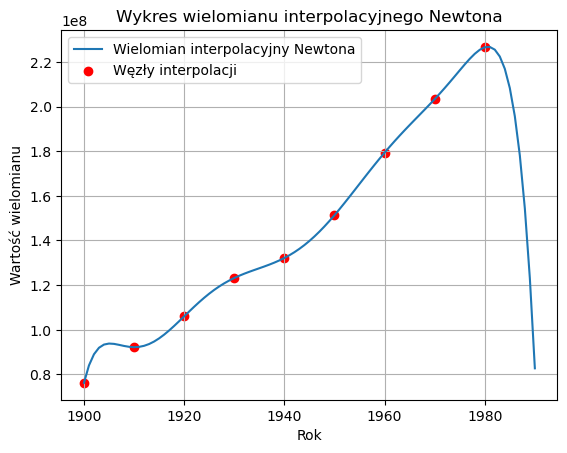

In [20]:
xs = np.arange(1900, 1991, 1)
ys = newton_polynomial_values(year, population, xs)

plt.plot(xs, ys, label = 'Wielomian interpolacyjny Newtona')
plt.scatter(year, population, color = 'red', label = 'Węzły interpolacji')
plt.xlabel('Rok')
plt.ylabel('Wartość wielomianu')
plt.title('Wykres wielomianu interpolacyjnego Newtona')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
calc_val = ys[-1]
rel_error = np.abs(act_val - calc_val) / act_val
print("Actual value: ", act_val)
print("Calculated value for Newton Interpolation Polynomial: ", calc_val)
print("Relative error: ", rel_error) 

Actual value:  248709873
Calculated value for Newton Interpolation Polynomial:  82749141.00000307
Relative error:  0.6672864651416429


Uzyskane wartości są bardzo podobne do tych z pierwszego podejścia i z wykorzystaniem wielomianu interpolacyjnego Lagrange'a. 